In [1]:
documents = []

ego_id = '40379006'

file = open('/home/amaury/Lucas/n2/textos_tradados/egos/' + ego_id + '.txt', 'r')
for line in file:
    documents.append(line)
file.close()

file = open('/home/amaury/Lucas/n2/textos_tradados/alters/' + ego_id + '.txt', 'r')
for line in file:
    documents.append(line)
file.close()

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 500 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [15]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 10
learning_decay = .9
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0,learning_decay = learning_decay).fit(tf)

In [16]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

In [17]:
no_top_words = 5
display_topics(lda, tf_feature_names, no_top_words)

Topic #0: new leaders goal live tonight
Topic #1: people know need think tweet
Topic #2: want times lord psalm game
Topic #3: jesus heart guys power church
Topic #4: amp time things teambossygals don
Topic #5: love day look today make
Topic #6: life watch god gt happy
Topic #7: god good great cslewis got
Topic #8: like best say god days
Topic #9: gt yes sure retweet teamalicia



In [18]:
import pandas as pd
import numpy as np
   
# Create Document - Topic Matrix
lda_output = lda.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# index names
docnames = [str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
   color = 'green' if val > .1 else 'black'
   return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0
1,0.73,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.16,0
2,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.82,9
3,0.01,0.01,0.76,0.01,0.01,0.01,0.01,0.15,0.01,0.01,2
4,0.03,0.03,0.37,0.03,0.03,0.03,0.03,0.03,0.03,0.37,2
5,0.02,0.63,0.02,0.02,0.02,0.02,0.21,0.02,0.02,0.02,1
6,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0
7,0.01,0.01,0.01,0.01,0.01,0.41,0.49,0.01,0.01,0.01,6
8,0.03,0.03,0.77,0.03,0.03,0.03,0.03,0.03,0.03,0.03,2
9,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.3,0.61,0.01,8


In [19]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,560
1,6,322
2,7,320
3,4,311
4,5,290
5,1,226
6,9,202
7,3,197
8,8,165
9,2,157


In [20]:
df_topic_distribution = df_document_topic['dominant_topic']
#df_topic_distribution.columns = ['Topic Num', 'Num Documents']
i = 0
for doc in df_topic_distribution:
    if doc == 0:
        print(documents[i])
    i = i + 1


Are cheering performance Tightrope ft 

FOLLOW SPREE If feeling VoiceBattles vibes tonight RETWEET follow alright 

rlyletsgo 

Leaders goal Shut background noise listen voices challenge stretch inspire g 

Leadership privilege 

HAHAHAHHA 

The previous generation ceiling becomes next generation floor Ps HillsongConf LetsTalkChurch 

Basically 

No passport required 

letsgowarriors 

You thought made little cottage He building palace He intends come live Hi 

Everyone come support tonight 

None 

travel much 

Join RLC Youth tonight 7pm 

When told LESS IS MORE DWTS 

Number one rule loft NewGirl 

I thank God I live country dreams come true failure sometimes 1st step success 

Save mornings Check 5 ways get handy Style Cards 

Still dreaming chocolate 

Jesus real OG respected New video 

Why cancel Clone Wars 

GodIsSofaithful 

looove coffee 

Community close live come together 

Therefore anyone Christ new creation The old passed away behold new come 2 Corint 

You never old set

In [21]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
panel

/usr/local/lib/python3.5/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
0      13.507259        1       1  -45.497383   45.558575
4      13.480865        1       2  194.359009  -38.621281
6      12.839614        1       3   -9.274588  -74.643936
7      12.704870        1       4    3.360685  169.769699
5      10.779830        1       5 -156.299133  108.720612
3       7.933122        1       6   76.822784   16.648222
1       7.799855        1       7  146.810242  125.859840
9       7.607155        1       8  -68.615784 -187.457199
8       7.174135        1       9   98.333450 -153.343323
2       6.173296        1      10 -153.320724  -51.780769, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
32    Default  226.000000           amp  226.000000  30.0000  30.0000
171   Default  270.000000           god  270.000000  29.0000  29.0000
261   Default  159.000000          love  159.000000  28.0000  28.0000
310   Default  122.000000        people  122.000000  27.0000  27.0000
244   Default   92.000000          like   92.000000  26.0000  26.0000
293   Default  106.000000           new  106.000000  25.0000  25.0000
50    Default   61.000000          best   61.000000  24.0000  24.0000
184   Default  108.000000            gt  108.000000  23.0000  23.0000
236   Default   78.000000       leaders   78.000000  22.0000  22.0000
497   Default   53.000000           yes   53.000000  21.0000  21.0000
242   Default  110.000000          life  110.000000  20.0000  20.0000
220   Default   61.000000         jesus   61.000000  19.0000  19.0000
473   Default   57.000000          want   57.000000  18.0000  18.0000
170   Default   74.000000          goal   74.000000  17.0000  17.0000
175   Default   81.000000          good   81.000000  16.0000  16.0000
101   Default   87.000000           day   87.000000  15.0000  15.0000
414   Default   43.000000          sure   43.000000  14.0000  14.0000
353   Default   41.000000       retweet   41.000000  13.0000  13.0000
181   Default   49.000000         great   49.000000  12.0000  12.0000
476   Default   52.000000         watch   52.000000  11.0000  11.0000
197   Default   40.000000         heart   40.000000  10.0000  10.0000
249   Default   73.000000          live   73.000000   9.0000   9.0000
256   Default   39.000000          look   39.000000   8.0000   8.0000
229   Default   70.000000          know   70.000000   7.0000   7.0000
436   Default   37.000000         times   37.000000   6.0000   6.0000
420   Default   48.000000    teamalicia   48.000000   5.0000   5.0000
430   Default   43.000000        things   43.000000   4.0000   4.0000
435   Default   71.000000          time   71.000000   3.0000   3.0000
248   Default   27.000000        little   27.000000   2.0000   2.0000
258   Default   47.000000          lord   47.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
427   Topic10    7.488082  thanksgiving   10.764853   2.4220  -4.3815
192   Topic10   14.704229          hard   22.313650   2.3679  -3.7067
190   Topic10    6.459683     happiness    9.925079   2.3555  -4.5293
308   Topic10    6.299636          path    9.797472   2.3433  -4.5543
493   Topic10    6.365030         worth    9.911049   2.3421  -4.5440
178   Topic10    6.378077         gotta    9.990872   2.3361  -4.5420
422   Topic10   10.240500          tell   16.220987   2.3250  -4.0685
201   Topic10    7.474616          high   12.509475   2.2700  -4.3833
436   Topic10   22.565833         times   37.783791   2.2695  -3.2784
398   Topic10   13.422580         stand   22.475575   2.2694  -3.7979
387   Topic10    8.681131          song   15.183789   2.2259  -4.2337
227   Topic10    4.906740          klay   10.043568   2.0686  -4.8042
371   Topic10    3.994362        senior    8.544195   2.0246  -5.0100
289   Topic10    3.937967     nbaawards  

Text(0.5, 1.0, 'Segregation of Topic Clusters')

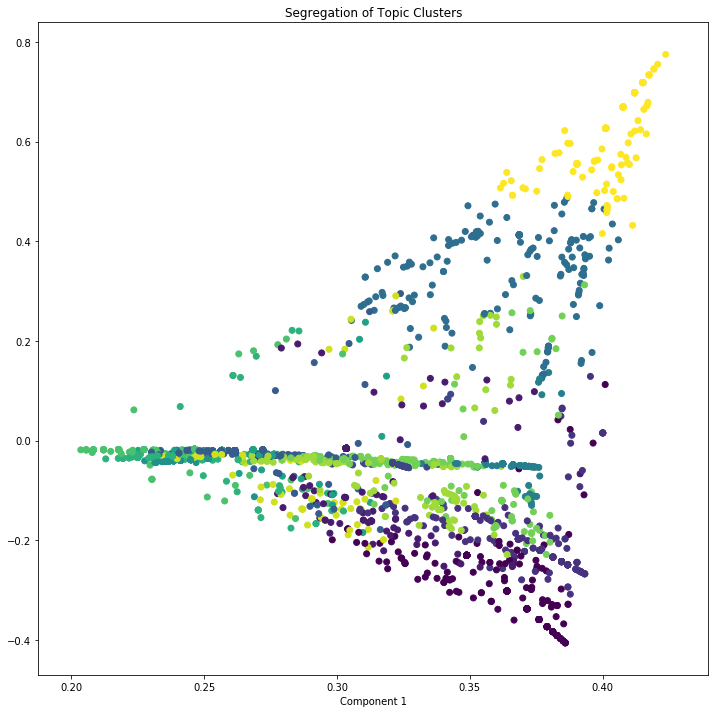

In [22]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )